In [1]:
# Data handling and manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Forecasting
from prophet import Prophet

# Machine learning (for optional regression/classification)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from scipy.stats import zscore

In [2]:
# Importing the dataset
df = pd.read_csv("weatherHistory.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-01-01 00:00:00.000 +0100,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140,9.9820,0,1016.66,Mostly cloudy throughout the day.
1,2006-01-01 01:00:00.000 +0100,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139,9.9015,0,1016.15,Mostly cloudy throughout the day.
2,2006-01-01 02:00:00.000 +0100,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140,9.9015,0,1015.87,Mostly cloudy throughout the day.
3,2006-01-01 03:00:00.000 +0100,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140,9.9015,0,1015.56,Mostly cloudy throughout the day.
4,2006-01-01 04:00:00.000 +0100,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134,9.9015,0,1014.98,Mostly cloudy throughout the day.


In [3]:
# Preprocessing the Data
df.rename(columns={'Formatted Date': 'Date'}, inplace=True)
df.replace('?', np.nan, inplace=True)
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

print("\nUpdated DataFrame info:")
print(df.info())

Missing values per column:
 Date                          0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95936 entries, 0 to 95935
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 

In [4]:
# Keeping the data from the latest year only
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df = df[df['Date'].dt.year == 2016].copy()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8409 entries, 87527 to 95935
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Date                      8409 non-null   datetime64[ns, UTC]
 1   Summary                   8409 non-null   object             
 2   Precip Type               8409 non-null   object             
 3   Temperature (C)           8409 non-null   float64            
 4   Apparent Temperature (C)  8409 non-null   float64            
 5   Humidity                  8409 non-null   float64            
 6   Wind Speed (km/h)         8409 non-null   float64            
 7   Wind Bearing (degrees)    8409 non-null   int64              
 8   Visibility (km)           8409 non-null   float64            
 9   Loud Cover                8409 non-null   int64              
 10  Pressure (millibars)      8409 non-null   float64            
 11  Daily Summary    

In [5]:
# Cleaning the data on anomaly values
df = df[df['Temperature (C)'].between(-50, 50)]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8409 entries, 87527 to 95935
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Date                      8409 non-null   datetime64[ns, UTC]
 1   Summary                   8409 non-null   object             
 2   Precip Type               8409 non-null   object             
 3   Temperature (C)           8409 non-null   float64            
 4   Apparent Temperature (C)  8409 non-null   float64            
 5   Humidity                  8409 non-null   float64            
 6   Wind Speed (km/h)         8409 non-null   float64            
 7   Wind Bearing (degrees)    8409 non-null   int64              
 8   Visibility (km)           8409 non-null   float64            
 9   Loud Cover                8409 non-null   int64              
 10  Pressure (millibars)      8409 non-null   float64            
 11  Daily Summary    

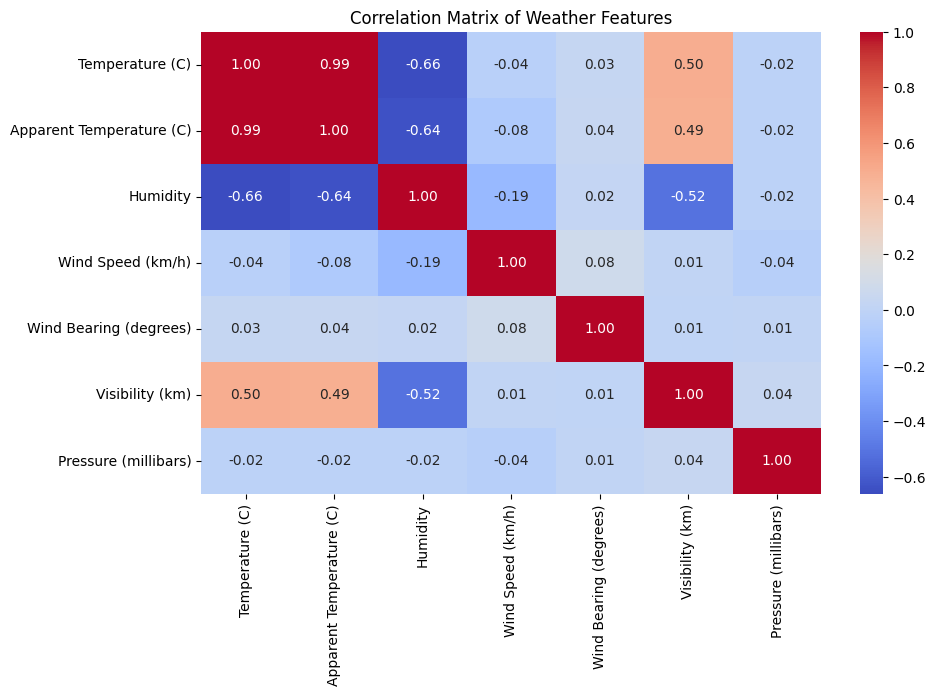

In [6]:
#  Correlation Heatmap --------
plt.figure(figsize=(10, 6))
numerical_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Weather Features')
plt.show()

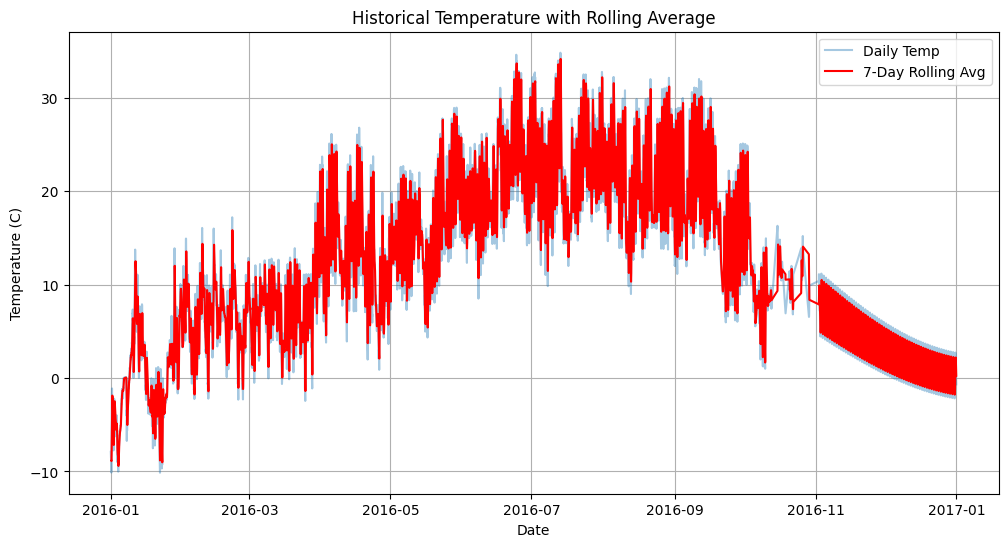

In [7]:
# Rolling Average Visualization
rolling_df = df.copy()
rolling_df.set_index('Date', inplace=True)
rolling_df['Rolling Mean'] = rolling_df['Temperature (C)'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(rolling_df['Temperature (C)'], label='Daily Temp', alpha=0.4)
plt.plot(rolling_df['Rolling Mean'], label='7-Day Rolling Avg', color='red')
plt.legend()
plt.title("Historical Temperature with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.grid(True)
plt.show()

11:58:51 - cmdstanpy - INFO - Chain [1] start processing
11:58:53 - cmdstanpy - INFO - Chain [1] done processing


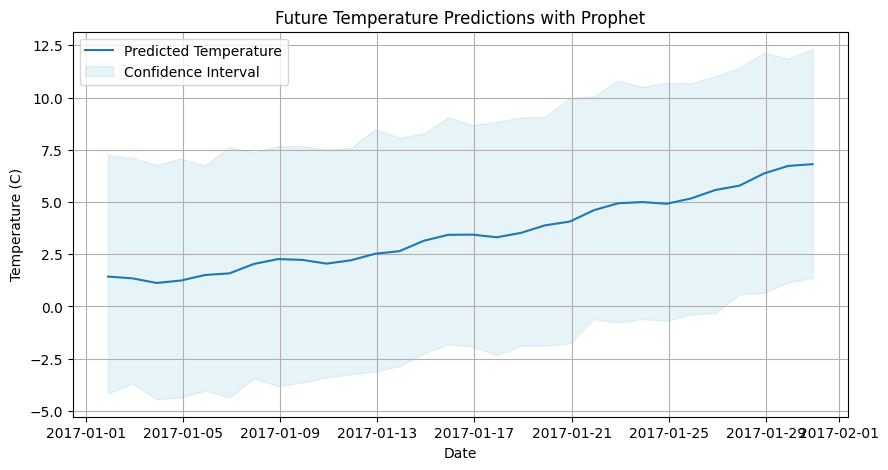

In [8]:
df_prophet = df[['Date', 'Temperature (C)']].copy()
df_prophet['ds'] = df_prophet['Date'].dt.tz_localize(None)  # Remove timezone info
df_prophet['y'] = df_prophet['Temperature (C)']

df_prophet = df_prophet[['ds', 'y']]

model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
# Get the last date from your original data
last_date = df_prophet['ds'].max()

# Filter forecast to keep only future dates
future_forecast = forecast[forecast['ds'] > last_date]

# Plot future predictions
plt.figure(figsize=(10, 5))
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Predicted Temperature')
plt.fill_between(future_forecast['ds'],
                 future_forecast['yhat_lower'],
                 future_forecast['yhat_upper'],
                 color='lightblue', alpha=0.3, label='Confidence Interval')
plt.title("Future Temperature Predictions with Prophet")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Linear Regression
df['Summary_enc'] = LabelEncoder().fit_transform(df['Summary'])
df['Daily_enc'] = LabelEncoder().fit_transform(df['Daily Summary'])
df['Precip_enc'] = LabelEncoder().fit_transform(df['Precip Type'])
dates = df['Date']

X = df.drop(columns=['Temperature (C)', 'Date', 'Precip Type', 'Daily Summary', 'Summary'])
y = df['Temperature (C)']

X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, dates, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [10]:
# Evaluate regression
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 0.82
R² Score: 0.99


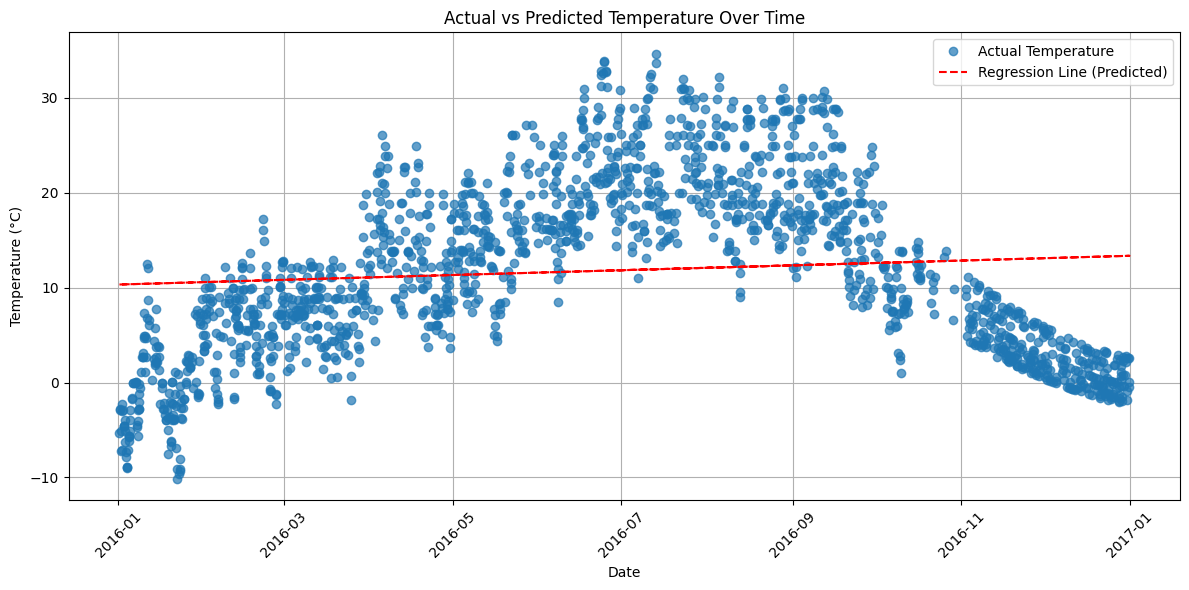

In [11]:
# Plot the regression model
df_plot = pd.DataFrame({'Date': dates_test, 'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(12, 6))

plt.plot(dates_test, y_test, label='Actual Temperature', marker='o', linestyle='', alpha=0.7)
df_plot['Date_ordinal'] = df_plot['Date'].map(pd.Timestamp.toordinal)
m, c = np.polyfit(df_plot['Date_ordinal'], df_plot['Predicted'], 1)
plt.plot(df_plot['Date'], m * df_plot['Date_ordinal'] + c, color='red', linestyle='--', label='Regression Line (Predicted)')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Actual vs Predicted Temperature Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
# LSTM Prediction (Advanced)
df_lstm = df[['Date', 'Temperature (C)']].copy()
df_lstm.set_index('Date', inplace=True)
df_lstm = df_lstm.resample('D').mean().interpolate()  # Daily average, interpolated

# Scale the data
scaler = MinMaxScaler()
scaled_temp = scaler.fit_transform(df_lstm[['Temperature (C)']])

In [13]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 30  # number of previous days
X, y = create_sequences(scaled_temp, window_size)

# Reshape X for LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))

In [14]:
# Splitting the data for train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=True)

Epoch 1/20


C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.1546 - val_loss: 0.0146
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0135 - val_loss: 0.0093
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0100 - val_loss: 0.0080
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0084 - val_loss: 0.0077
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0080 - val_loss: 0.0072
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0059 - val_loss: 0.0090
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - val_loss: 0.0070
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0080 - val_loss: 0.0068
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0072 - val_loss: 0.0069
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0077 - val_l

In [15]:
# Predict on test set
y_pred = model.predict(X_test)

# Inverse scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step


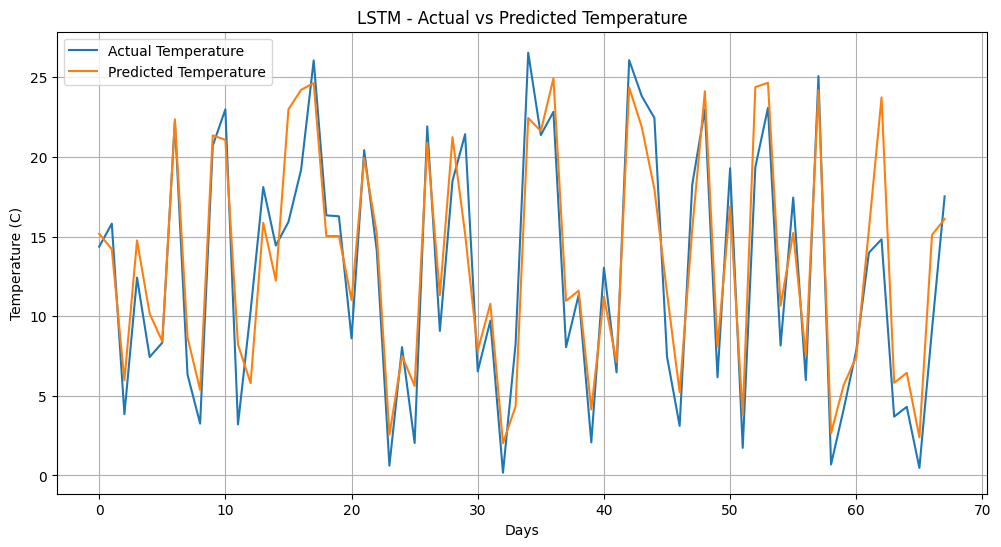

In [16]:
# Plotting the actual vs predicted results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Temperature')
plt.plot(y_pred_inv, label='Predicted Temperature')
plt.legend()
plt.title("LSTM - Actual vs Predicted Temperature")
plt.xlabel("Days")
plt.ylabel("Temperature (C)")
plt.grid(True)
plt.show()

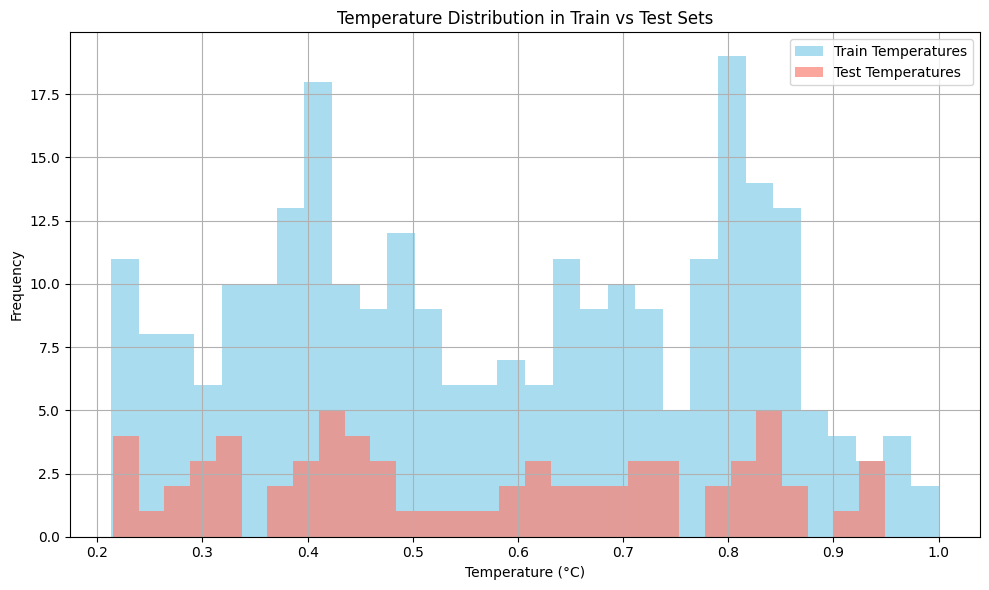

In [17]:
# Plotting a histogram for additional visualization
plt.figure(figsize=(10, 6))

plt.hist(y_train, bins=30, alpha=0.7, label='Train Temperatures', color='skyblue')
plt.hist(y_test, bins=30, alpha=0.7, label='Test Temperatures', color='salmon')

plt.title("Temperature Distribution in Train vs Test Sets")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

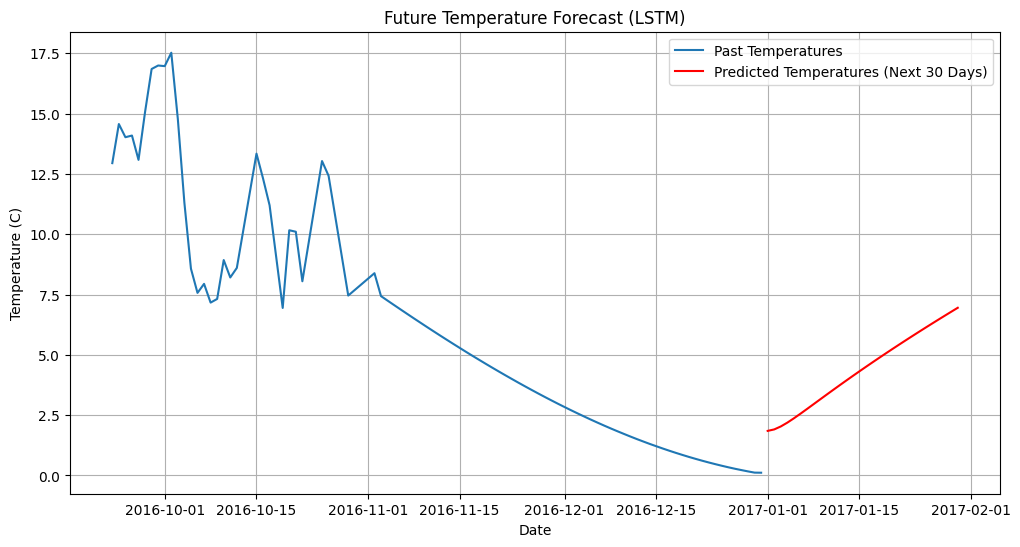

In [18]:
# Forecasting future values
last_sequence = scaled_temp[-window_size:]
future_predictions = []

for _ in range(30):  # Predict next 30 days
    input_seq = last_sequence.reshape((1, window_size, 1))
    next_pred = model.predict(input_seq)[0][0]
    future_predictions.append(next_pred)
    last_sequence = np.append(last_sequence[1:], [[next_pred]], axis=0)

# Inverse scale predictions
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create future dates
last_date = df_lstm.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_lstm.index[-100:], df_lstm['Temperature (C)'].values[-100:], label="Past Temperatures")
plt.plot(future_dates, future_predictions_inv, label="Predicted Temperatures (Next 30 Days)", color='red')
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.title("Future Temperature Forecast (LSTM)")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Reset index to get 'Formatted Date' back as a column
df_clustering = df.reset_index()

# Group by day and take average (if needed)
daily_weather = df_clustering.groupby(df_clustering['Date'].dt.date).agg({
    'Temperature (C)': 'mean',
    'Humidity': 'mean',
    'Wind Speed (km/h)': 'mean',
    'Visibility (km)': 'mean'
}).reset_index()

# Normalize the features
scaler = StandardScaler()
features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)']
scaled_features = scaler.fit_transform(daily_weather[features])


In [20]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add clusters to DataFrame
daily_weather['Cluster'] = clusters


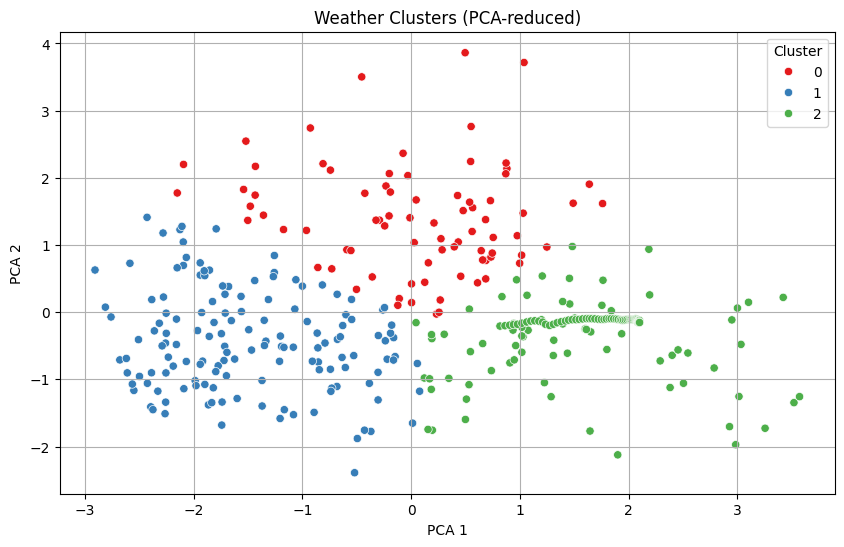

In [21]:
# Reduce to 2D for plotting
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_features)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=daily_weather['Cluster'], palette='Set1')
plt.title("Weather Clusters (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


In [22]:
# Average weather per cluster
cluster_summary = daily_weather.groupby('Cluster')[features].mean()
print(cluster_summary)


         Temperature (C)  Humidity  Wind Speed (km/h)  Visibility (km)
Cluster                                                               
0              10.632935  0.756408          16.331437        12.695750
1              19.431332  0.660768           8.085701        13.998281
2               4.996948  0.873261          10.092776         7.884339


In [23]:
# Recalculate daily average temperature
df_anomaly = df.reset_index()
daily_temp = df_anomaly.groupby(df_anomaly['Date'].dt.date)['Temperature (C)'].mean().reset_index()
daily_temp.columns = ['Date', 'Temperature (C)']


In [24]:
# Calculate Z-scores
daily_temp['Z-Score'] = zscore(daily_temp['Temperature (C)'])

# Define anomalies (e.g., |Z| > 2)
threshold = 2
daily_temp['Anomaly'] = daily_temp['Z-Score'].apply(lambda z: 'Yes' if abs(z) > threshold else 'No')


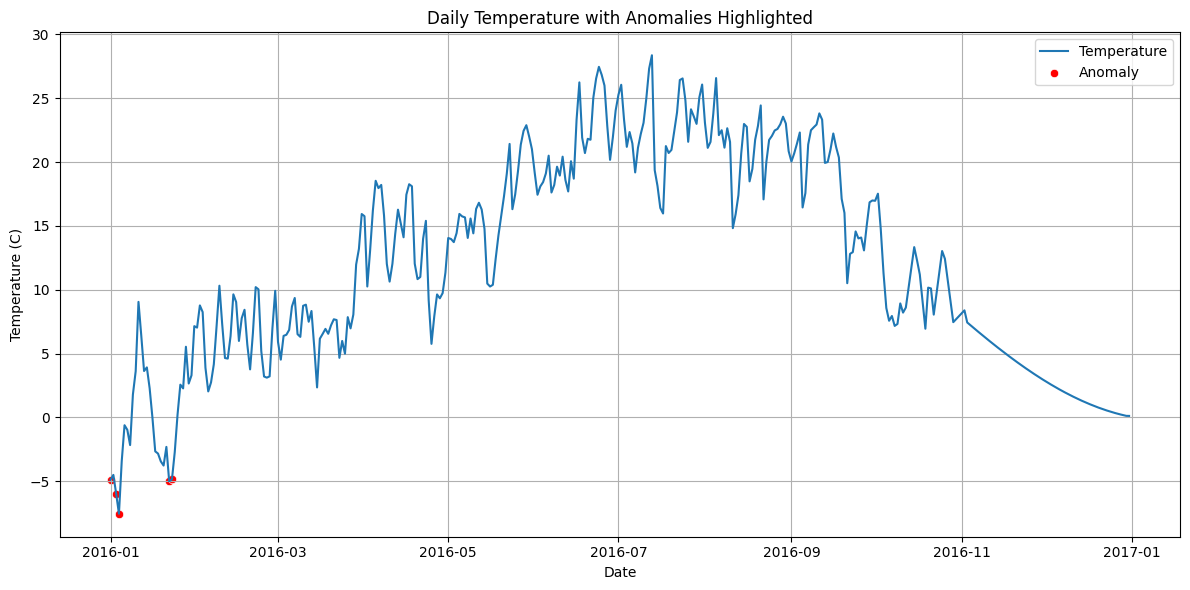

In [25]:
# Plot anomalies on temperature graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_temp, x='Date', y='Temperature (C)', label='Temperature')
sns.scatterplot(data=daily_temp[daily_temp['Anomaly'] == 'Yes'], x='Date', y='Temperature (C)', color='red', label='Anomaly')
plt.title("Daily Temperature with Anomalies Highlighted")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
# See which days were flagged as anomalies
anomaly_days = daily_temp[daily_temp['Anomaly'] == 'Yes']
print(anomaly_days)

          Date  Temperature (C)   Z-Score Anomaly
0   2016-01-01        -4.883102 -2.023838     Yes
2   2016-01-03        -5.978472 -2.154477     Yes
3   2016-01-04        -7.556019 -2.342622     Yes
21  2016-01-22        -5.005556 -2.038443     Yes
22  2016-01-23        -4.854167 -2.020387     Yes


In [27]:
# Min, Max, Average and Standard Deviation of data
min_temp = df['Temperature (C)'].min()
min_temp_date = df.loc[df['Temperature (C)'] == min_temp, 'Date'].iloc[0]

# Maximum temperature and its date
max_temp = df['Temperature (C)'].max()
max_temp_date = df.loc[df['Temperature (C)'] == max_temp, 'Date'].iloc[0]

# Average temperature
avg_temp = df['Temperature (C)'].mean()

# Standard deviation of temperature
std_temp = df['Temperature (C)'].std()

print(f"Minimum Temperature: {min_temp:.2f}°C on {min_temp_date}")
print(f"Maximum Temperature: {max_temp:.2f}°C on {max_temp_date}")
print(f"Average Temperature: {avg_temp:.2f}°C")
print(f"Standard Deviation: {std_temp:.2f}°C")

Minimum Temperature: -10.13°C on 2016-01-22 07:00:00+00:00
Maximum Temperature: 34.81°C on 2016-07-13 13:00:00+00:00
Average Temperature: 12.12°C
Standard Deviation: 9.17°C


In [28]:
# Reset index and filter columns
df_ml = df.reset_index()
df_ml = df_ml[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
               'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)', 'Summary']].copy()

# Encode the categorical target
label_encoder = LabelEncoder()
df_ml['SummaryEncoded'] = label_encoder.fit_transform(df_ml['Summary'])

In [29]:
# Training the model for classification of Summary
X = df_ml.drop(['Summary', 'SummaryEncoded'], axis=1)
y = df_ml['SummaryEncoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [30]:
labels = np.unique(y_test)  # Only use the classes present in y_test
target_names = label_encoder.inverse_transform(labels)

print("Classification Report:")
print(classification_report(y_test, y_pred, labels=labels, target_names=target_names, zero_division=True))

Classification Report:
                          precision    recall  f1-score   support

Breezy and Mostly Cloudy       1.00      0.00      0.00         2
     Breezy and Overcast       0.82      0.82      0.82        11
Breezy and Partly Cloudy       0.00      0.00      0.00         1
                   Clear       0.56      0.31      0.40        88
                 Drizzle       1.00      0.83      0.91         6
                   Foggy       1.00      1.00      1.00        62
 Humid and Mostly Cloudy       1.00      0.00      0.00         2
              Light Rain       0.80      0.80      0.80         5
           Mostly Cloudy       0.68      0.71      0.69       613
                Overcast       0.67      0.59      0.63       280
           Partly Cloudy       0.71      0.76      0.74       611
                    Rain       1.00      0.00      0.00         1

                accuracy                           0.70      1682
               macro avg       0.77      0.49      

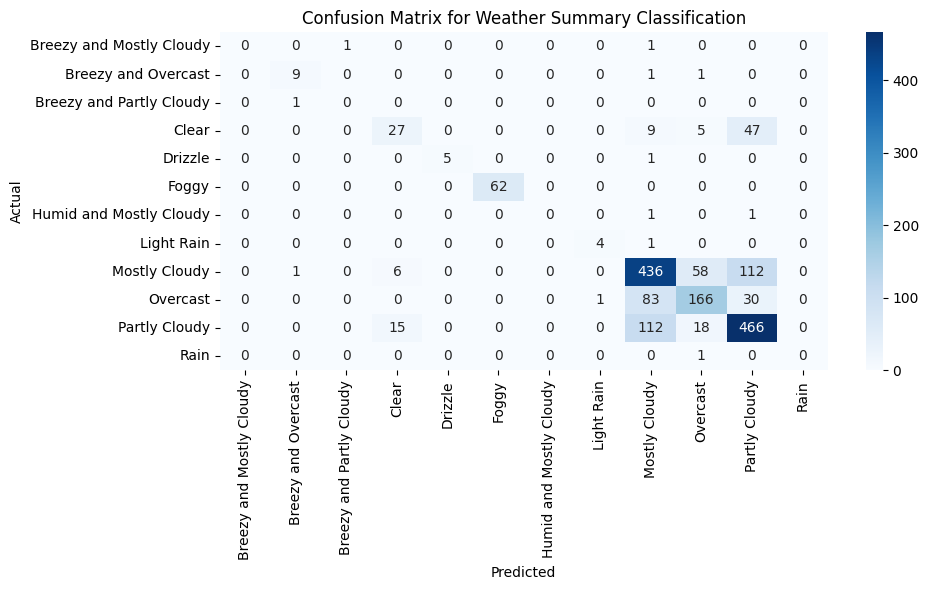

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=labels), annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Weather Summary Classification")
plt.tight_layout()
plt.show()